In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns
import joblib

In [2]:
dataset_name = 'Banknote' #Iris, Wine, Vertebral-Column, Pima, Parkinsons, Breast_Cancer, Blood_Transfusion, Ionosphere, Glass, Climate, Modeling, Banknote, Sonar
#dataset_title_name = 'BANK' # IRIS, WINE, VRTC, Pima, Parkinsons, Breast_Cancer, Blood_Transfusion, Ionosphere, Glass, Climate, Modeling, BANK
p = 0.25
raw_df = pd.read_csv(f'{dataset_name}_results/raw_metric_data_0.25.csv')
raw_df

,times_onestep,times_twostep,feature_sizes_onestep,feature_sizes_twostep,rsum_onestep,rsum_twostep,coverage_onestep,coverage_twostep,time_relative_%,sizes_relative_%,rsum_relative_%,coverage_relative_%
0,0.021662,0.020755,2,2,2.597173,2.601509,109,133,-4.186978,0.0,0.166963,22.018349
1,0.017607,0.025704,3,3,2.585484,2.589045,27,28,45.988527,0.0,0.137735,3.703704
2,0.017379,0.023261,3,3,2.614558,2.618859,21,50,33.840063,0.0,0.164505,138.095238
3,0.018716,0.023146,3,3,2.590879,2.592922,52,73,23.674902,0.0,0.078853,40.384615
4,0.016717,0.024921,3,3,2.612113,2.614734,7,14,49.073703,0.0,0.100334,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
1024,0.017048,0.022894,3,3,2.344821,2.349333,11,44,34.288279,0.0,0.192440,300.000000
1025,0.017416,0.024740,3,3,2.345629,2.348373,24,27,42.056214,0.0,0.116994,12.500000
1026,0.019275,0.022930,3,3,2.338629,2.344159,14,47,18.964560,0.0,0.236439,235.714286
1027,0.017402,0.023076,3,3,2.350638,2.356070,38,13,32.601625,0.0,0.231063,-65.789474


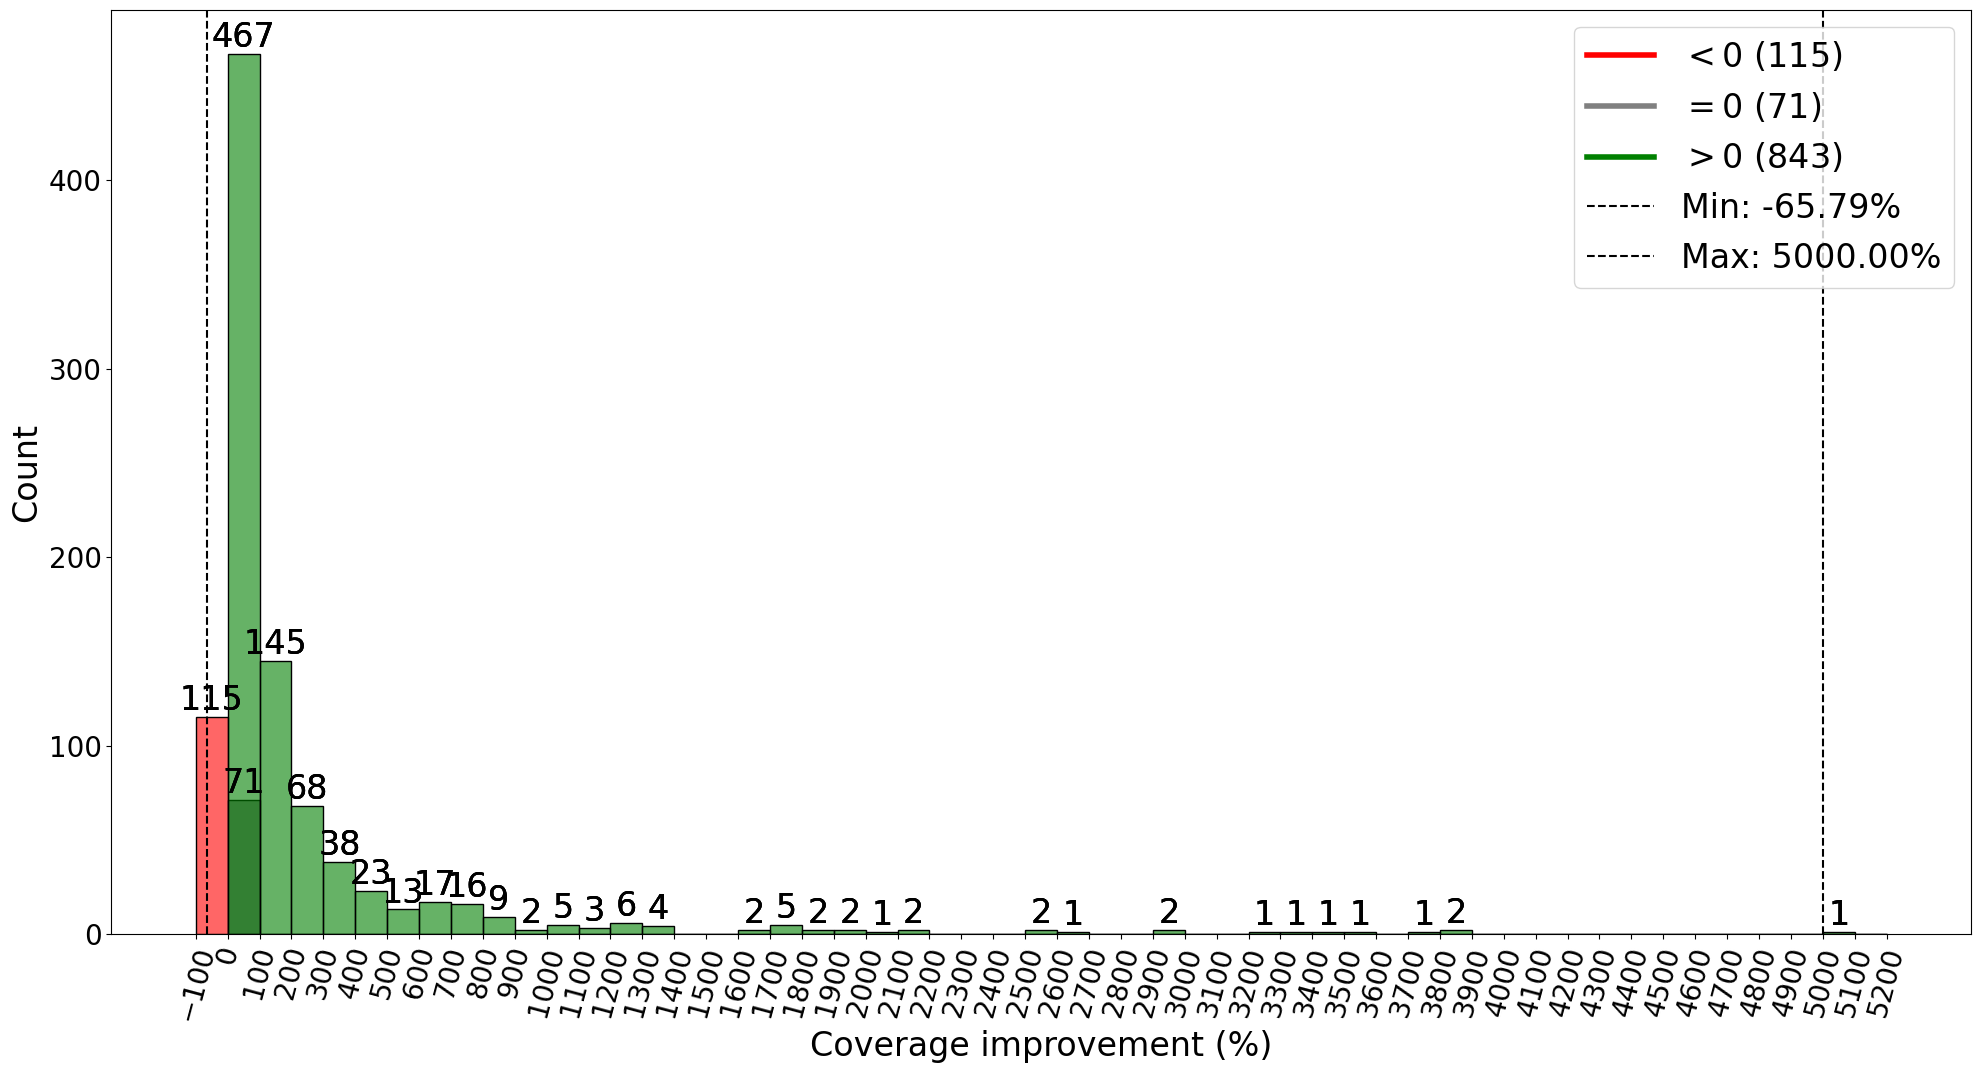

In [3]:
# Compute relative proportion
relative_proportion = np.where(
    raw_df['coverage_onestep'] != 0,
    ((raw_df['coverage_twostep'] - raw_df['coverage_onestep']) / raw_df['coverage_onestep']) * 100,
    np.nan
)

# Separate values
values_lt_0 = relative_proportion[relative_proportion < 0]
values_eq_0 = relative_proportion[relative_proportion == 0]
values_gt_0 = relative_proportion[relative_proportion > 0]

# Define bin width and edges
bin_width = 100
min_value = -bin_width if np.nanmin(relative_proportion) >= -bin_width else np.ceil(np.nanmin(relative_proportion) / -bin_width) * -bin_width
max_value = np.nanmax(relative_proportion) + bin_width

bin_edges_lt_0 = np.arange(min_value, bin_width+1, bin_width)  # Bins for < 0 values
bin_edges_gt_0 = np.arange(0, max_value+1+bin_width, bin_width)  # Bins for > 0 values

# Create figure
plt.figure(figsize=(24, 12))

# Plot histograms separately
ax_list = []
if len(values_lt_0) > 0:
    ax_lt_0 = sns.histplot(values_lt_0, bins=bin_edges_lt_0, kde=False, color='red', alpha=0.6, label=r'$ < 0$')
    ax_list.append(ax_lt_0)
if len(values_eq_0) > len(values_gt_0[values_gt_0<bin_width]):    
    ax_eq_0 = sns.histplot(values_eq_0, bins=bin_edges_gt_0, kde=False, color='gray', alpha=0.6, label=r'$ = 0$')
    ax_list.append(ax_eq_0)
else:
    ax_eq_0 = sns.histplot(values_eq_0, bins=bin_edges_gt_0, kde=False, color='gray', alpha=1, label=r'$ = 0$')
    ax_list.append(ax_eq_0)

if len(values_gt_0) > 0:
    ax_gt_0 = sns.histplot(values_gt_0, bins=bin_edges_gt_0, kde=False, color='green', alpha=0.6, label=r'$ > 0$')
    ax_list.append(ax_gt_0)

# Add numbers above each bin
for ax in ax_list:
    for patch in ax.patches:
        height = patch.get_height()
        if height > 0:
            plt.text(
                patch.get_x() + patch.get_width() / 2,  # Centered in bin
                height,  # Position above the bar
                f'{int(height)}',  # Rounded count
                ha='center', va='bottom', fontsize=24
            )



# Adjust xticks
xticks = np.arange(min_value, max_value+1+bin_width, bin_width)
plt.xticks(xticks, rotation=75,fontsize=20)
plt.yticks(fontsize=20)

# Find the y-position of the highest bar
max_height = max([patch.get_height() for patch in plt.gca().patches])

ax = plt.gca()  # Get current axis
ax.axvline(relative_proportion.min(), color='black', linestyle='--', label=f'Min: {relative_proportion.min():.2f}')
ax.axvline(relative_proportion.max(), color='black', linestyle='--', label=f'Max: {relative_proportion.max():.2f}')



# Labels and title
plt.ylabel('Count',fontsize=24)
plt.xlabel('Coverage improvement (%)',fontsize=24)
#plt.title(f'{dataset_title_name} - Elementwise coverage (%) comparison Twostep vs Onestep (n={len(raw_df)}, p={p})',fontsize=24)

# Correct legend
min_line = mlines.Line2D([], [], color='black', linestyle='--', label=f'Min: {relative_proportion.min():.2f}%')
max_line = mlines.Line2D([], [], color='black', linestyle='--', label=f'Max: {relative_proportion.max():.2f}%')

# Define existing legend handles
legend_handles = [
    plt.Line2D([0], [0], color='red', lw=4, label=rf'$ < 0$ ({len(values_lt_0)})'),
    plt.Line2D([0], [0], color='gray', lw=4, label=rf'$ = 0$ ({len(values_eq_0)})'),
    plt.Line2D([0], [0], color='green', lw=4, label=rf'$ > 0$ ({len(values_gt_0)})'),
    min_line,  # Add min line
    max_line   # Add max line
]

# Update the legend
plt.legend(handles=legend_handles, loc='upper right',fontsize=24)


#plt.savefig(f"{dataset_name}_results/{dataset_name}_artificial_coverage_{p}.eps", format='eps', dpi=300, bbox_inches='tight')
plt.savefig(f"relative_coverage/{dataset_name}_original_coverage_{p}.png", format='png', dpi=300, bbox_inches='tight')
plt.show()
